In [380]:
import dlib
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import torch
from torch import nn

In [381]:
image = cv2.imread("D:/Workspace/DeepLearnig/ComputerVision/MasterClass/Image_test/2 (12).jpg")
rgb_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

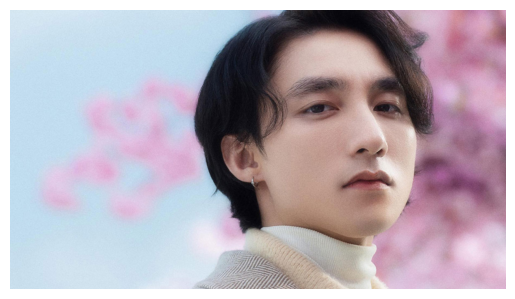

In [382]:
plt.axis("off")
plt.imshow(rgb_img)

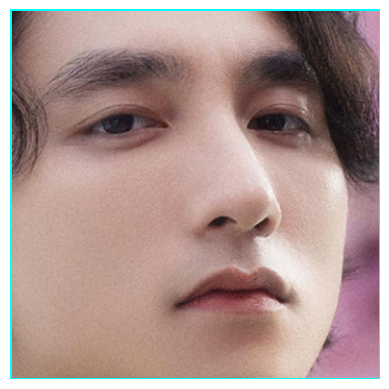

In [383]:
face_detector = dlib.get_frontal_face_detector()
detection = face_detector(rgb_img,1)
for face in detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()

    cv2.rectangle(rgb_img, (l, t), (r, b), (0, 255, 255), 2)

    face_crop = rgb_img[t:b, l:r]  # Dùng đúng cú pháp NumPy

    plt.figure()  # Tạo một cửa sổ mới cho hình ảnh khuôn mặt
    plt.imshow(face_crop)
    plt.axis('off')
    plt.show()


In [384]:
face_pil = Image.fromarray(face_crop)

img_rs = face_pil.resize((64, 64))

img_rs_np = np.array(img_rs)

In [385]:
img_rs_np.max(),img_rs_np.min()

(244, 16)

In [386]:
img_rs_np.shape

(64, 64, 3)

In [387]:
img_rs_np = img_rs_np

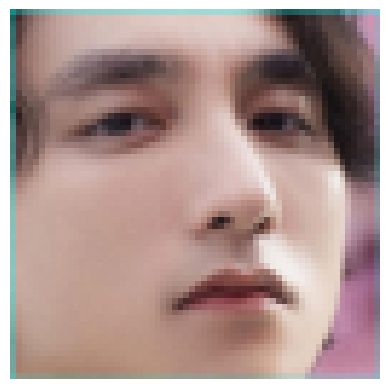

In [388]:
plt.imshow(img_rs_np)
plt.axis('off')
plt.show()

In [389]:
def get_image_data():
    paths = [os.path.join('D:\Workspace\DeepLearnig\ComputerVision\MasterClass\Image_test',f) for f in os.listdir('D:\Workspace\DeepLearnig\ComputerVision\MasterClass\Image_test')]
    face =[]
    ids = []
    #D:\Workspace\DeepLearnig\ComputerVision\MasterClass\Image_test\1 (1).jpg
    for path in paths:
        image = Image.open(path).convert('L')
        image_np = np.array(image,'uint8')
        face.append(image_np)
        id = int(path.split("\\")[6].split(" ")[0])
        ids.append(id)
    return face,np.array(ids)

In [390]:
img_list,ids = get_image_data()

In [391]:
img_list

[array([[234, 234, 234, ...,  44,  41,  40],
        [234, 234, 235, ...,  42,  40,  38],
        [235, 235, 235, ...,  41,  39,  38],
        ...,
        [199, 199, 199, ...,  44,  44,  44],
        [198, 199, 199, ...,  44,  44,  44],
        [198, 198, 199, ...,  44,  45,  45]], dtype=uint8),
 array([[234, 234, 234, ...,  39,  36,  35],
        [234, 234, 234, ...,  38,  36,  35],
        [234, 234, 234, ...,  37,  36,  35],
        ...,
        [197, 197, 197, ...,  40,  40,  39],
        [196, 196, 197, ...,  40,  40,  39],
        [196, 196, 197, ...,  40,  40,  39]], dtype=uint8),
 array([[234, 234, 234, ...,  46,  44,  42],
        [234, 234, 235, ...,  45,  42,  41],
        [235, 235, 235, ...,  42,  40,  39],
        ...,
        [196, 196, 197, ...,  40,  40,  40],
        [195, 196, 197, ...,  40,  41,  41],
        [196, 196, 197, ...,  41,  41,  40]], dtype=uint8),
 array([[235, 235, 235, ...,  42,  39,  38],
        [235, 235, 235, ...,  40,  39,  38],
        [235, 23

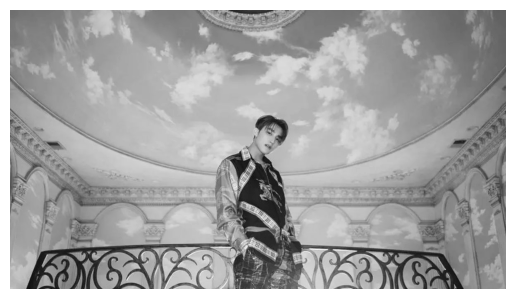

In [392]:
plt.axis("off")
plt.imshow(img_list[20],cmap="gray")

In [393]:
def get_face_data(img_list):
    face_list = []  
    ids_new = []
    for index, img in enumerate(img_list):  # Dùng enumerate để lấy index tự động
        detection = face_detector(img, 1)
        if len(detection) == 0:  # Kiểm tra nếu không tìm thấy khuôn mặt
            print(f"Cannot detect the image with index: {index}")
            continue
        
        face = detection[0]
        l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
        face_crop = img[t:b, l:r]  # Cắt ảnh khuôn mặt
        face_pil = Image.fromarray(face_crop)
        img_rs = face_pil.resize((64, 64))
        img_rs_np = np.array(img_rs)
        face_list.append(img_rs_np)
        ids_new.append(ids[index])  # Lưu khuôn mặt vào danh sách
    
    return np.array(face_list),np.array(ids_new)  # Chuyển danh sách thành numpy array


In [394]:
face,ids = get_face_data(img_list)

Cannot detect the image with index: 2
Cannot detect the image with index: 3
Cannot detect the image with index: 4
Cannot detect the image with index: 9
Cannot detect the image with index: 10
Cannot detect the image with index: 25
Cannot detect the image with index: 26
Cannot detect the image with index: 30
Cannot detect the image with index: 32
Cannot detect the image with index: 35
Cannot detect the image with index: 36


In [395]:
len(face),len(ids)

(52, 52)

In [396]:
face.shape

(52, 64, 64)

In [397]:
face[0]

array([[144, 115,  91, ...,  26,  28,  27],
       [225, 201, 139, ...,  27,  29,  30],
       [245, 245, 190, ...,  28,  31,  33],
       ...,
       [148, 143, 142, ...,  68,  73,  70],
       [125, 134, 137, ...,  62,  72,  75],
       [126, 141, 152, ...,  59,  74,  82]], dtype=uint8)

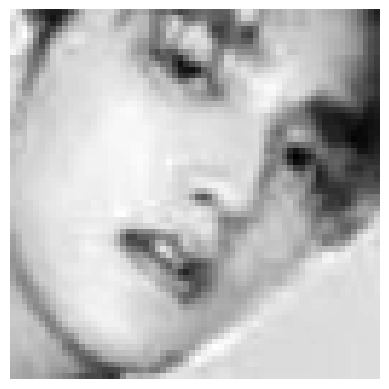

In [398]:
plt.axis("off")
plt.imshow(face[15],cmap="gray")

In [399]:
num_id = len(np.unique(ids))

In [400]:
num_id

4

In [401]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ClassifierFace(nn.Module):
    def __init__(self, input_size, output_unit):
        super(ClassifierFace, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  # 1 input channel (grayscale)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        # Pooling
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(64 * (input_size // 4) * (input_size // 4), 128)  # Adaptive size
        self.fc2 = nn.Linear(128, output_unit)  # Output layer (số lớp = số danh mục)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.maxpool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> MaxPool
        x = self.maxpool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> MaxPool
        
        x = torch.flatten(x, start_dim=1)  # Chuyển thành vector phẳng
        x = F.relu(self.fc1(x))  # Fully connected 1
        x = self.fc2(x)  # Fully connected 2 (output)
        x = self.sigmoid(x)
        return x


In [402]:
model = ClassifierFace(input_size=64,output_unit=num_id+1)

In [403]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [404]:
y = torch.tensor(ids)
y = y.to(torch.long)

In [405]:
X = face 
y = torch.nn.functional.one_hot(y, num_classes=num_id+1)
y = y.float()


In [406]:
X = torch.from_numpy(X).float()

In [407]:
X = X.unsqueeze(1)

In [408]:
X.shape

torch.Size([52, 1, 64, 64])

In [409]:
epochs = 2000
for epoch in range(epochs):
    model.train()  # Đặt mô hình ở chế độ training
    
    optimizer.zero_grad()  # Reset gradient trước mỗi batch
    y_pred = model(X)  # Dự đoán đầu ra
    loss = loss_fn(y_pred, y)  # Tính loss
    loss.backward()  # Tính gradient
    optimizer.step()  # Cập nhật trọng số
    if epoch % 100 ==0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")  # In loss mỗi epoch


Epoch 1/2000, Loss: 1.9081
Epoch 101/2000, Loss: 1.9048
Epoch 201/2000, Loss: 1.9048
Epoch 301/2000, Loss: 1.9048
Epoch 401/2000, Loss: 1.9048
Epoch 501/2000, Loss: 1.9048
Epoch 601/2000, Loss: 1.6094
Epoch 701/2000, Loss: 1.6094
Epoch 801/2000, Loss: 1.6094
Epoch 901/2000, Loss: 1.6094
Epoch 1001/2000, Loss: 1.6094
Epoch 1101/2000, Loss: 1.6094
Epoch 1201/2000, Loss: 1.6094
Epoch 1301/2000, Loss: 1.6094
Epoch 1401/2000, Loss: 1.6094
Epoch 1501/2000, Loss: 1.6094
Epoch 1601/2000, Loss: 1.6094
Epoch 1701/2000, Loss: 1.6094
Epoch 1801/2000, Loss: 1.6094
Epoch 1901/2000, Loss: 1.6094


In [410]:
y_pre =  model(X)
y_pre

tensor([[0.0000e+00, 5.4274e-11, 3.8441e-15, 1.2742e-17, 2.8543e-09],
        [0.0000e+00, 4.2335e-12, 2.7424e-14, 1.0221e-15, 2.2145e-06],
        [0.0000e+00, 1.0007e-10, 3.0730e-14, 5.9812e-17, 2.8514e-08],
        [0.0000e+00, 9.0507e-11, 2.6023e-14, 5.5313e-17, 2.4862e-08],
        [0.0000e+00, 7.1471e-12, 2.9862e-16, 3.1856e-18, 3.6183e-09],
        [0.0000e+00, 1.1438e-10, 2.2938e-14, 8.8737e-17, 2.6611e-08],
        [0.0000e+00, 3.7982e-12, 1.7297e-15, 1.8946e-17, 1.6813e-08],
        [0.0000e+00, 1.2486e-11, 4.1750e-16, 3.1982e-18, 4.1109e-09],
        [0.0000e+00, 1.6866e-13, 4.7309e-16, 3.2262e-17, 1.0385e-05],
        [0.0000e+00, 1.8421e-10, 6.5778e-15, 4.8217e-17, 2.6097e-08],
        [0.0000e+00, 2.3553e-10, 5.7782e-15, 8.3032e-17, 3.2964e-08],
        [0.0000e+00, 1.6079e-13, 1.6519e-18, 1.5742e-19, 6.6668e-09],
        [0.0000e+00, 1.2944e-12, 3.3031e-17, 1.8778e-17, 1.4634e-09],
        [0.0000e+00, 1.7899e-13, 3.5457e-19, 9.5297e-20, 5.1856e-10],
        [0.0000e+00,

In [411]:
y_labels = torch.argmax(y_pre, dim=1)
y_labels


tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
        4, 4, 4, 4])